# Домашка по понижению размерности

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

![alt text](https://www.techforspace.com/wp-content/uploads/2016/07/Wing12A.gif   "An airfoil")
Source: quest.nasa.gov

#### Данные

In [4]:
X = np.loadtxt('airfoils.csv', delimiter=',', usecols = range(57))
test = np.loadtxt('afl_test.csv', delimiter=',')
ref_points = test[0, :] # reference points 
X_test = test[1:, :] # airfoil shape

print(X.shape)
print(X_test.shape)

(199, 57)
(1, 57)


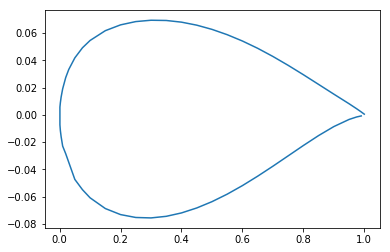

In [5]:
plt.plot(ref_points, X_test[0], label = 'Original')

### Создаем PCA

In [6]:
#TODO: initialize & fit PCA model with 2 dimenions (n_components=2)
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
from sklearn.decomposition import PCA

In [11]:
X_transformed = pca.transform(X_test)

In [13]:
X_recovered = pca.inverse_transform(X_transformed)

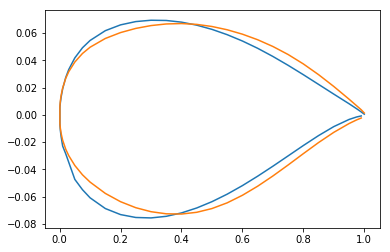

In [14]:
plt.plot(ref_points, X_test[0], label = 'Original')
plt.plot(ref_points, X_recovered[0], label = 'Recovered')

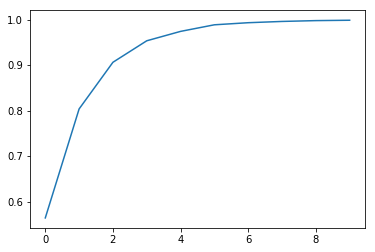

In [15]:
pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_[:10]))

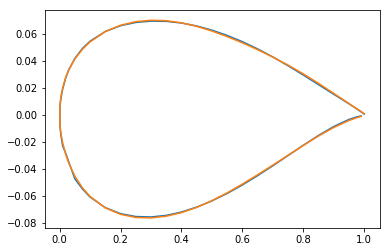

In [16]:
#6 is the most optimal
pca = PCA(n_components=6)
pca.fit(X)
X_recovered = pca.inverse_transform(pca.transform(X_test))
plt.plot(ref_points, X_test[0], label = 'Original')
plt.plot(ref_points, X_recovered[0], label = 'Recovered')

### Генерим airfoil сами

In [17]:
def gen_random_point(X_min, X_max, dim):
    return np.random.rand(dim) * (X_max - X_min) + X_min

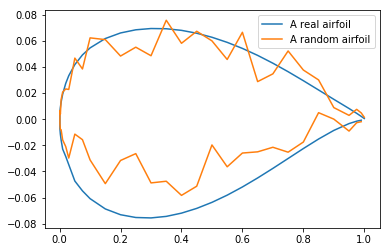

In [18]:
# determine the range in original space
min_afl = np.min(X, 0)
max_afl = np.max(X, 0)

rand_afl = gen_random_point(min_afl, max_afl, 57)
plt.plot(ref_points, X_test[0], label = 'A real airfoil')
plt.plot(ref_points, rand_afl, label = 'A random airfoil')
plt.legend()

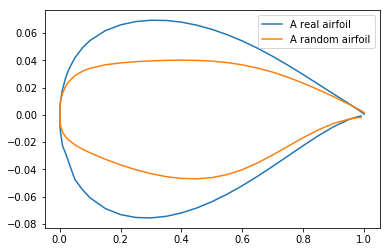

In [19]:
X_transformed = pca.transform(X)

# determine the range in original space
min_afl = np.min(X_transformed, 0)
max_afl = np.max(X_transformed, 0)

rand_afl = gen_random_point(min_afl, max_afl, 6)
plt.plot(ref_points, X_test[0], label = 'A real airfoil')
plt.plot(ref_points, pca.inverse_transform(rand_afl), label = 'A random airfoil')
plt.legend()